## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

/Users/vmaudgalya/anaconda3/envs/dtx/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.1


In [2]:
# Read the data
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(f'Training images shape = {training_images.shape}')
print(f'Training labels shape = {training_labels.shape}')
print(f'Test images shape = {test_images.shape}')
print(f'Test labels shape = {test_labels.shape}')

Training images shape = (60000, 28, 28)
Training labels shape = (60000,)
Test images shape = (10000, 28, 28)
Test labels shape = (10000,)


In [4]:
print(f'Number of classes = {np.unique(training_labels).size}')

Number of classes = 10


In [5]:
# Reshape the data for Keras
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# Normalize the data
training_images = training_images / 255.0
test_images = test_images / 255.0

In [6]:
# Define the model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a callback for stopping training early
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        """
        Called at the end of an epoch.
        
        Keyword Arguments:
        epoch: integer, index of epoch.
        logs: dict, metric results for this training epoch, and
              for the validation epoch if validation is performed.
              Validation result keys are prefixed with val_.
        """
        current_accuracy = logs.get('acc')
        if (current_accuracy is not None and current_accuracy >= 0.998):
            print(f'\nReached {current_accuracy}% accuracy so cancelling training!\n')
            self.model.stop_training = True

# Initialize the callback            
cb = EarlyStoppingCallback()   

# Train the model
history = model.fit(training_images, training_labels, epochs=20, callbacks=[cb])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               346240    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 18s 30

Text(0, 0.5, 'Accuracy')

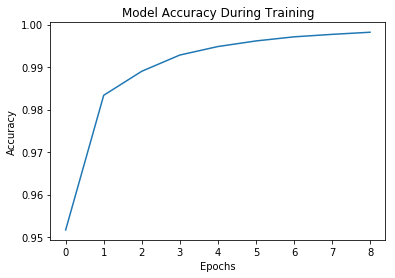

In [7]:
# Visualize model training
plt.plot(history.history['acc'])
plt.title('Model Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [8]:
# View evaluation accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'loss={test_loss}, accuracy={test_acc}')

10000/10000 [==============================] - 1s 110us/sample - loss: 0.0469 - acc: 0.9870
loss=0.04692108136293063, accuracy=0.9869999885559082
